In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [130]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [131]:
df = pd.read_csv('MergedOutput_final.csv')

In [132]:
print(df.shape)
df.head()

(296, 41)


,Ref,Age,Sex,Hispanic,Race,CitizenshipStatus,PrimaryCitizenship,UGDegreeConvertedGPA,UGDegreeType,UGDegreeMajorType,UGDegreeSchoolTranscriptSubmitted?,EmailsOpenedinPast60Days,EmailsClickedinPast60Days,English_Score,Analytical_Score,InquiryMadeInd,Ping-TotalCount,ApplicationSlateID,HUB66:EntryTermadmit_term,App_TurnAroundTime,GDegreeConvertedGPA,GDegree_ind,GDegreeSchoolTranscriptSubmitted?,AppForm:Auto-AdmitConfirmEligibilityYes/No,AppForm:Auto-AdmitProcessingCompleteYes/No,AppForm:GMAT/GREStandardizedTestWaiverOptInY/N(NotPMBA),IntentToEnroll,InterestedTrack,OtherInstitutionsApplied?,OtherUBProgramApplied?,Pre-EnrollmentSalaryRange,AppForm:PreviousUBEnrollmentProgram,StandardizedTestWaived(ReaderIndicator),Events_NoShow,Events_Attended,Events_Registered,Events_Cancelled,Events_Pending,Positive_Interaction_count,Negative_Interaction_count,Grades_CumulativeGPA
0,367568860,27,F,No,Asian,Foreign National,India,3.5280,Bachelor,Engineering,1,0,0,81,91,1,749,443558582,Fall 2021,0,NaN,0,0,0,0,0,Determined,Unsure,Unknown,Unknown,Unknown,Unknown,0,4,5,19,0,0,4,0,3.751
1,505374298,30,F,No,Asian,Foreign National,India,3.0400,Bachelor,Engineering,1,0,0,90,92,1,1133,391066974,Spring 2021,0,NaN,0,0,0,0,0,Determined,Information Systems Track,Unknown,Unknown,Unknown,Unknown,0,1,4,26,1,0,1,0,3.973
2,97640048,25,M,No,Asian,Foreign National,India,3.9440,Bachelor,Engineering,1,0,0,83,89,0,2209,501505777,Fall 2021,23,NaN,0,0,0,0,0,UnSure,Unsure,1,Unknown,Unknown,Unknown,0,0,7,16,0,0,0,0,3.917
3,249754073,28,M,No,Asian,Foreign National,India,2.9968,Bachelor,Engineering,1,0,0,74,0,0,626,496793846,Fall 2021,15,NaN,0,0,0,0,1,Determined,Unsure,Unknown,Unknown,Unknown,Unknown,1,1,2,16,0,0,0,0,3.890
4,943575643,24,M,No,Asian,Foreign National,India,3.7000,Bachelor,Engineering,1,1,0,79,91,0,790,571842232,Fall 2021,0,NaN,0,0,0,0,0,UnSure,Unsure,Unknown,Unknown,Unknown,Unknown,0,0,2,32,3,0,0,0,3.723


In [133]:
column_names = df.columns.tolist()

column_names

['Ref',
 'Age',
 'Sex',
 'Hispanic',
 'Race',
 'CitizenshipStatus',
 'PrimaryCitizenship',
 'UGDegreeConvertedGPA',
 'UGDegreeType',
 'UGDegreeMajorType',
 'UGDegreeSchoolTranscriptSubmitted?',
 'EmailsOpenedinPast60Days',
 'EmailsClickedinPast60Days',
 'English_Score',
 'Analytical_Score',
 'InquiryMadeInd',
 'Ping-TotalCount',
 'ApplicationSlateID',
 'HUB66:EntryTermadmit_term',
 'App_TurnAroundTime',
 'GDegreeConvertedGPA',
 'GDegree_ind',
 'GDegreeSchoolTranscriptSubmitted?',
 'AppForm:Auto-AdmitConfirmEligibilityYes/No',
 'AppForm:Auto-AdmitProcessingCompleteYes/No',
 'AppForm:GMAT/GREStandardizedTestWaiverOptInY/N(NotPMBA)',
 'IntentToEnroll',
 'InterestedTrack',
 'OtherInstitutionsApplied?',
 'OtherUBProgramApplied?',
 'Pre-EnrollmentSalaryRange',
 'AppForm:PreviousUBEnrollmentProgram',
 'StandardizedTestWaived(ReaderIndicator)',
 'Events_NoShow',
 'Events_Attended',
 'Events_Registered',
 'Events_Cancelled',
 'Events_Pending',
 'Positive_Interaction_count',
 'Negative_Interacti

In [134]:
#selecting only the important columns that we understood from feature importances 
df1 = df[[
#'Ref',
#'Age',
'Sex',
#'Hispanic',
#'Race',
#'CitizenshipStatus',
'PrimaryCitizenship',
'UGDegreeConvertedGPA',
#'UGDegreeType',
#'UGDegreeMajorType',
#'UGDegreeSchoolTranscriptSubmitted?',
#'EmailsOpenedinPast60Days',
#'EmailsClickedinPast60Days',
'English_Score',
'Analytical_Score',
#'InquiryMadeInd',
'Ping-TotalCount',
#'ApplicationSlateID',
#'HUB66:EntryTermadmit_term',
#'App_TurnAroundTime',
#'GDegreeConvertedGPA',
#'GDegree_ind',
#'GDegreeSchoolTranscriptSubmitted?',
#'AppForm:Auto-AdmitConfirmEligibilityYes/No',
#'AppForm:Auto-AdmitProcessingCompleteYes/No',
#'AppForm:GMAT/GREStandardizedTestWaiverOptInY/N(NotPMBA)',
'IntentToEnroll',
#'InterestedTrack',
#'OtherInstitutionsApplied?',
#'OtherUBProgramApplied?',
#'Pre-EnrollmentSalaryRange',
#'AppForm:PreviousUBEnrollmentProgram',
'StandardizedTestWaived(ReaderIndicator)',
#'Events_NoShow',
'Events_Attended',
'Events_Registered',
#'Events_Cancelled',
#'Events_Pending',
#'Positive_Interaction_count',
#'Negative_Interaction_count',
'Grades_CumulativeGPA'
]]

In [135]:
df1.isnull().sum()

Sex                                         0
PrimaryCitizenship                          0
UGDegreeConvertedGPA                       24
English_Score                               0
Analytical_Score                            0
Ping-TotalCount                             0
IntentToEnroll                              0
StandardizedTestWaived(ReaderIndicator)     0
Events_Attended                             0
Events_Registered                           0
Grades_CumulativeGPA                        0
dtype: int64

In [136]:
df1.dtypes

Sex                                         object
PrimaryCitizenship                          object
UGDegreeConvertedGPA                       float64
English_Score                                int64
Analytical_Score                             int64
Ping-TotalCount                              int64
IntentToEnroll                              object
StandardizedTestWaived(ReaderIndicator)      int64
Events_Attended                              int64
Events_Registered                            int64
Grades_CumulativeGPA                       float64
dtype: object

In [137]:
df1['UGDegreeConvertedGPA'].mean()

3.03051548161765

In [138]:
#impute null values of UGDegreeConvertedGPA with its mean
df1 = df1.fillna(value = {'UGDegreeConvertedGPA': df['UGDegreeConvertedGPA'].mean()})
df1.isnull().sum()

Sex                                        0
PrimaryCitizenship                         0
UGDegreeConvertedGPA                       0
English_Score                              0
Analytical_Score                           0
Ping-TotalCount                            0
IntentToEnroll                             0
StandardizedTestWaived(ReaderIndicator)    0
Events_Attended                            0
Events_Registered                          0
Grades_CumulativeGPA                       0
dtype: int64

In [139]:
# one-hot encode categorical variables
df2 = pd.get_dummies(df1, drop_first=True)

In [140]:
df2.head()

,UGDegreeConvertedGPA,English_Score,Analytical_Score,Ping-TotalCount,StandardizedTestWaived(ReaderIndicator),Events_Attended,Events_Registered,Grades_CumulativeGPA,Sex_M,PrimaryCitizenship_India,PrimaryCitizenship_Jordan,PrimaryCitizenship_Nigeria,PrimaryCitizenship_South Korea,PrimaryCitizenship_Taiwan,PrimaryCitizenship_United States,PrimaryCitizenship_Vietnam,IntentToEnroll_Determined,IntentToEnroll_UnSure
0,3.5280,81,91,749,0,5,19,3.751,0,1,0,0,0,0,0,0,1,0
1,3.0400,90,92,1133,0,4,26,3.973,0,1,0,0,0,0,0,0,1,0
2,3.9440,83,89,2209,0,7,16,3.917,1,1,0,0,0,0,0,0,0,1
3,2.9968,74,0,626,1,2,16,3.890,1,1,0,0,0,0,0,0,1,0
4,3.7000,79,91,790,0,2,32,3.723,1,1,0,0,0,0,0,0,0,1


In [141]:
df2.dtypes

UGDegreeConvertedGPA                       float64
English_Score                                int64
Analytical_Score                             int64
Ping-TotalCount                              int64
StandardizedTestWaived(ReaderIndicator)      int64
Events_Attended                              int64
Events_Registered                            int64
Grades_CumulativeGPA                       float64
Sex_M                                        uint8
PrimaryCitizenship_India                     uint8
PrimaryCitizenship_Jordan                    uint8
PrimaryCitizenship_Nigeria                   uint8
PrimaryCitizenship_South Korea               uint8
PrimaryCitizenship_Taiwan                    uint8
PrimaryCitizenship_United States             uint8
PrimaryCitizenship_Vietnam                   uint8
IntentToEnroll_Determined                    uint8
IntentToEnroll_UnSure                        uint8
dtype: object

In [142]:
# normalize the data
scaler = MinMaxScaler()
df3 = scaler.fit_transform(df2)

C:\Users\Rimpy khokhar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Rimpy khokhar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\Rimpy khokhar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Rimpy khokhar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

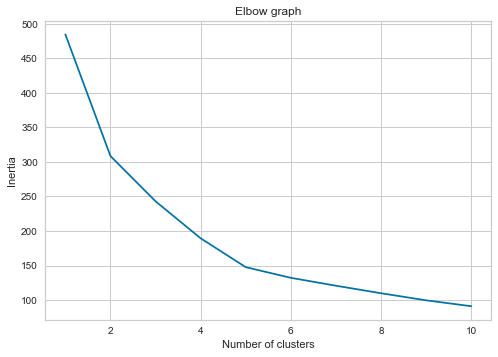

In [143]:
# identifying the optimal K for clustering 

# create an empty list to store the inertia values for different values of K
inertia = []

# loop through different values of K and calculate the inertia for each value
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df3)
    inertia.append(kmeans.inertia_)

# plot the elbow graph
plt.plot(range(1, 11), inertia)
plt.title('Elbow graph')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\Rimpy khokhar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\Rimpy khokhar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\Rimpy khokhar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\Rimpy khokhar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, 

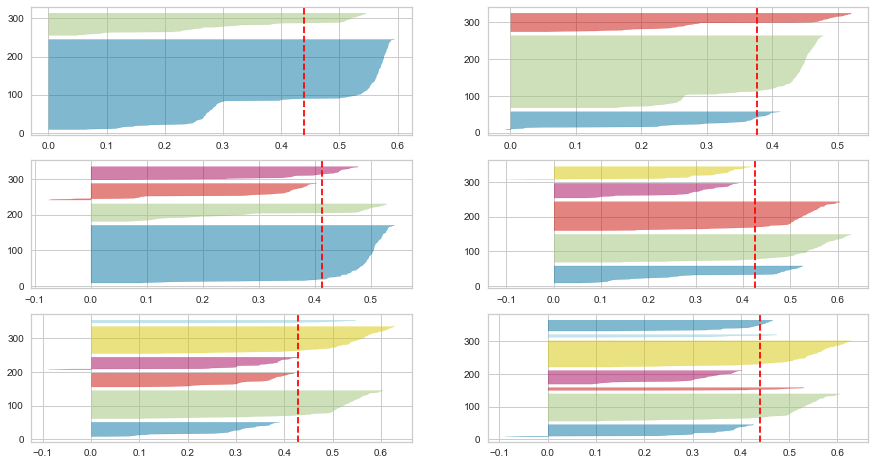

In [144]:
# identifying the preciously the optimal K for clustering 

!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df3) 

In [145]:
# perform k-means clustering
kmeans = KMeans(n_clusters = 4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df3)

C:\Users\Rimpy khokhar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



In [146]:
df2['segment'] = pred_y
df2.head()

,UGDegreeConvertedGPA,English_Score,Analytical_Score,Ping-TotalCount,StandardizedTestWaived(ReaderIndicator),Events_Attended,Events_Registered,Grades_CumulativeGPA,Sex_M,PrimaryCitizenship_India,PrimaryCitizenship_Jordan,PrimaryCitizenship_Nigeria,PrimaryCitizenship_South Korea,PrimaryCitizenship_Taiwan,PrimaryCitizenship_United States,PrimaryCitizenship_Vietnam,IntentToEnroll_Determined,IntentToEnroll_UnSure,segment
0,3.5280,81,91,749,0,5,19,3.751,0,1,0,0,0,0,0,0,1,0,0
1,3.0400,90,92,1133,0,4,26,3.973,0,1,0,0,0,0,0,0,1,0,0
2,3.9440,83,89,2209,0,7,16,3.917,1,1,0,0,0,0,0,0,0,1,3
3,2.9968,74,0,626,1,2,16,3.890,1,1,0,0,0,0,0,0,1,0,2
4,3.7000,79,91,790,0,2,32,3.723,1,1,0,0,0,0,0,0,0,1,3


In [147]:
df2.to_excel('Cluster_segments_goodcluster_v2.xlsx', index=False)

In [148]:
#Cluster prediciton using random forest classifier
#we have clusters so now let's convert this unsupervised learning to classification problem and use random forest classifier for prediction and evaluate the prediction accuracy

df_p = pd.DataFrame(df3)
df_p["segment"] = pred_y

In [149]:
df_p.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,segment
0,0.803333,0.852632,0.928571,0.190053,0.0,0.333333,0.351351,0.670635,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.600000,0.947368,0.938776,0.287490,0.0,0.266667,0.540541,0.964286,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.976667,0.873684,0.908163,0.560518,0.0,0.466667,0.270270,0.890212,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
3,0.582000,0.778947,0.000000,0.158843,1.0,0.133333,0.270270,0.854497,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
4,0.875000,0.831579,0.928571,0.200457,0.0,0.133333,0.702703,0.633598,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3


In [150]:
# Split dataset into features and target
y = df_p['segment']
X = df_p.drop('segment', axis=1)


In [151]:
# View count of each class
y.value_counts()

0    165
1     50
3     43
2     38
Name: segment, dtype: int64

In [152]:
# Split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [153]:
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [154]:
# Make predictions for the test set
y_pred_test = forest.predict(X_test)

In [155]:
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.9864864864864865

In [156]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[41,  0,  0,  0],
       [ 0, 12,  0,  0],
       [ 0,  1,  9,  0],
       [ 0,  0,  0, 11]], dtype=int64)

In [157]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.92      1.00      0.96        12
           2       1.00      0.90      0.95        10
           3       1.00      1.00      1.00        11

    accuracy                           0.99        74
   macro avg       0.98      0.97      0.98        74
weighted avg       0.99      0.99      0.99        74



In [158]:
#evaluation metric the well-segment clusters using silhouette_score

from sklearn.metrics import silhouette_score

df4 = df2.drop(['segment'], axis =1)

clusters = df2['segment']

Sil_Score = silhouette_score(df4, clusters, metric="euclidean")

Sil_Score

-0.08604906089306202

In [159]:
#evaluation metric the well-segment clusters using calinski_harabasz_score

from sklearn.metrics import calinski_harabasz_score

df4 = df2.drop(['segment'], axis =1)

clusters = df2['segment']

Cal_Score = calinski_harabasz_score(df4, clusters)

Cal_Score

3.112316838386039

In [160]:
# visualize the clusters
!pip install plotly==5.14.1
import plotly.graph_objects as go  #for 3D plot

## K-means using k = 4
kmeans = KMeans(n_clusters= 4)
kmeans.fit(df3)
y_kmeans = kmeans.predict(df3)

## 3D plot 
Scene = dict(xaxis = dict(title  = 'sepal_length -->'),yaxis = dict(title  = 'sepal_width--->'),zaxis = dict(title  = 'petal_length-->'))

labels = kmeans.labels_
trace = go.Scatter3d(x=df3[:, 0], y=df3[:, 1], z=df3[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

C:\Users\Rimpy khokhar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Rimpy khokhar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



In [161]:
print(df2['segment'].value_counts())
df2['Binary segment 0'] = df2['segment'].map({0:1, 1:0, 2:0, 3:0})
print("\n", df2['Binary segment 0'].value_counts())

0    165
1     50
3     43
2     38
Name: segment, dtype: int64

 1    165
0    131
Name: Binary segment 0, dtype: int64


In [162]:
# Train a classifier

df2.dropna(inplace=True)
df4 = df2.drop(columns = ['segment', 'Binary segment 0'])
df5 = scaler.fit_transform(df4)

df5 = pd.DataFrame(df5, columns=df4.columns)


In [163]:
clf = RandomForestClassifier(random_state=1)
clf.fit(df5.values, df2["Binary segment 0"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

# Get the most important features names and weights
most_important_features = np.take_along_axis(
    np.array(df5.iloc[:, :].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

[('StandardizedTestWaived(ReaderIndicator)', 0.2503913805082538),
 ('IntentToEnroll_UnSure', 0.21033107323057987),
 ('Analytical_Score', 0.19999060460284512),
 ('IntentToEnroll_Determined', 0.19336270577854595),
 ('Events_Registered', 0.037774606548666115),
 ('English_Score', 0.027171285165422613),
 ('UGDegreeConvertedGPA', 0.018333619003003024),
 ('Ping-TotalCount', 0.015348108703171333),
 ('PrimaryCitizenship_India', 0.013022219038962415),
 ('Events_Attended', 0.01134214585695078),
 ('Grades_CumulativeGPA', 0.009476823000326455),
 ('PrimaryCitizenship_United States', 0.008074041637713922),
 ('Sex_M', 0.002464448730360999),
 ('PrimaryCitizenship_Nigeria', 0.0014525792359517654),
 ('PrimaryCitizenship_Taiwan', 0.0007622209310871394),
 ('PrimaryCitizenship_Jordan', 0.0003335336989285127),
 ('PrimaryCitizenship_South Korea', 0.00019606433132149167),
 ('PrimaryCitizenship_Vietnam', 0.00017253999790860575)]

In [120]:
print(df2['segment'].value_counts())
df2['Binary segment 0'] = df2['segment'].map({0:0, 1:1, 2:0, 3:0})
print("\n", df2['Binary segment 0'].value_counts())

0    165
1     50
3     43
2     38
Name: segment, dtype: int64

 0    246
1     50
Name: Binary segment 0, dtype: int64


In [121]:
# Train a classifier

df2.dropna(inplace=True)
df4 = df2.drop(columns = ['segment', 'Binary segment 0'])
df5 = scaler.fit_transform(df4)

df5 = pd.DataFrame(df5, columns=df4.columns)

In [122]:
clf = RandomForestClassifier(random_state=1)
clf.fit(df5.values, df2["Binary segment 0"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

# Get the most important features names and weights
most_important_features = np.take_along_axis(
    np.array(df5.iloc[:, :].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

[('PrimaryCitizenship_India', 0.2654540036641851),
 ('PrimaryCitizenship_United States', 0.2077173661267949),
 ('English_Score', 0.15287525226675072),
 ('Events_Registered', 0.15218644872757184),
 ('IntentToEnroll_UnSure', 0.040350198632459776),
 ('StandardizedTestWaived(ReaderIndicator)', 0.03899488031859776),
 ('Analytical_Score', 0.03331008320527965),
 ('UGDegreeConvertedGPA', 0.02919449157383465),
 ('Events_Attended', 0.02257494839254053),
 ('IntentToEnroll_Determined', 0.01921971327397614),
 ('Grades_CumulativeGPA', 0.011896660071942868),
 ('Ping-TotalCount', 0.010405770274300698),
 ('PrimaryCitizenship_Vietnam', 0.008895984195520814),
 ('PrimaryCitizenship_Nigeria', 0.002747717059189733),
 ('Sex_M', 0.001617917628722259),
 ('PrimaryCitizenship_South Korea', 0.0014060507493752932),
 ('PrimaryCitizenship_Jordan', 0.0008036134425885019),
 ('PrimaryCitizenship_Taiwan', 0.00034890039636875083)]

In [123]:
print(df2['segment'].value_counts())
df2['Binary segment 0'] = df2['segment'].map({0:0, 1:0, 2:1, 3:0})
print("\n", df2['Binary segment 0'].value_counts())

0    165
1     50
3     43
2     38
Name: segment, dtype: int64

 0    258
1     38
Name: Binary segment 0, dtype: int64


In [124]:
# Train a classifier

df2.dropna(inplace=True)
df4 = df2.drop(columns = ['segment', 'Binary segment 0'])
df5 = scaler.fit_transform(df4)

df5 = pd.DataFrame(df5, columns=df4.columns)

In [125]:
clf = RandomForestClassifier(random_state=1)
clf.fit(df5.values, df2["Binary segment 0"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

# Get the most important features names and weights
most_important_features = np.take_along_axis(
    np.array(df5.iloc[:, :].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

[('StandardizedTestWaived(ReaderIndicator)', 0.2703290299144927),
 ('Analytical_Score', 0.1786592785555674),
 ('IntentToEnroll_UnSure', 0.11025378841056316),
 ('PrimaryCitizenship_India', 0.0936719480156845),
 ('IntentToEnroll_Determined', 0.08312212542839159),
 ('Events_Registered', 0.05961448685144562),
 ('English_Score', 0.04748480608049397),
 ('Ping-TotalCount', 0.03656705134543259),
 ('UGDegreeConvertedGPA', 0.03587234051759756),
 ('PrimaryCitizenship_United States', 0.030069564346779872),
 ('Events_Attended', 0.027979211345135275),
 ('Grades_CumulativeGPA', 0.023644474130894533),
 ('Sex_M', 0.0019352531810208561),
 ('PrimaryCitizenship_Vietnam', 0.00065140236930117),
 ('PrimaryCitizenship_South Korea', 0.00014523950719917412),
 ('PrimaryCitizenship_Jordan', 0.0),
 ('PrimaryCitizenship_Nigeria', 0.0),
 ('PrimaryCitizenship_Taiwan', 0.0)]

In [126]:
print(df2['segment'].value_counts())
df2['Binary segment 0'] = df2['segment'].map({0:0, 1:0, 2:0, 3:1})
print("\n", df2['Binary segment 0'].value_counts())

0    165
1     50
3     43
2     38
Name: segment, dtype: int64

 0    253
1     43
Name: Binary segment 0, dtype: int64


In [127]:
# Train a classifier

df2.dropna(inplace=True)
df4 = df2.drop(columns = ['segment', 'Binary segment 0'])
df5 = scaler.fit_transform(df4)

df5 = pd.DataFrame(df5, columns=df4.columns)

In [128]:
clf = RandomForestClassifier(random_state=1)
clf.fit(df5.values, df2["Binary segment 0"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

# Get the most important features names and weights
most_important_features = np.take_along_axis(
    np.array(df5.iloc[:, :].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

[('IntentToEnroll_UnSure', 0.3139513362472458),
 ('IntentToEnroll_Determined', 0.2216820007203053),
 ('English_Score', 0.1167670468539093),
 ('PrimaryCitizenship_India', 0.08864372553635481),
 ('Events_Registered', 0.05569635170542247),
 ('PrimaryCitizenship_United States', 0.05109162249729595),
 ('UGDegreeConvertedGPA', 0.037860645776595925),
 ('Events_Attended', 0.026704937340974774),
 ('Analytical_Score', 0.02660938795837804),
 ('Ping-TotalCount', 0.02240829512220114),
 ('Grades_CumulativeGPA', 0.015543028568294412),
 ('StandardizedTestWaived(ReaderIndicator)', 0.011111828050022154),
 ('PrimaryCitizenship_South Korea', 0.006711380315617061),
 ('Sex_M', 0.003423522293497496),
 ('PrimaryCitizenship_Vietnam', 0.001794891013885346),
 ('PrimaryCitizenship_Jordan', 0.0),
 ('PrimaryCitizenship_Nigeria', 0.0),
 ('PrimaryCitizenship_Taiwan', 0.0)]